**Keşif veri analizi ( EDA )**, veri setlerinin temel özelliklerini genellikle görsel yöntemlerle özetlemek için analiz etmeye yönelik bir yaklaşımdır.

**Seaborn :** istatistiksel veri görselleştirme, EDA gerçekleştirmek için popüler bir Python kitaplığıdır.

Matplotlib tabanlıdır ve çekici ve bilgilendirici istatistiksel grafikler çizmek için üst düzey bir arayüz sağlar.

Bu gönderide örnek olarak kazınmış ve temizlenmiş bir YouTube veri kümesini kullanacağız .

In [1]:
import os 
os.chdir("C:\\Users\\Excalibur\\Desktop\\VERİ BİLİMİ\\_____VERİ_SETLERİ_____")

In [2]:
import pandas as pd
import numpy as np

import json
import datetime
import math

from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import seaborn as sns

import warnings
warnings.filterwarnings("ignore") # uyarıları görmezden gel

In [3]:
df = pd.read_pickle("sydney.pkl")

In [4]:
df.head()

,title,posted_ago,length,views,link,calories,date,days_since_posted,title_word_set,area,...,title_contains_tone,title_contains_kickboxing,title_contains_workout,title_contains_boot camp,title_contains_burnout,title_contains_toned,title_contains_superset,num_body_areas,num_workout_types,num_other_keywords
0,30 Minute HIIT Workout 🔥Burn 500 Calories! 🔥,1 year,31.0,197591,/watch?v=Mcpyp9PRtU8,500.0,2018-02-01,711.0,"{calori, hiit, 30, !, workout, minut, 500, 🔥bu...",full,...,False,False,True,False,False,False,False,1,2,1
1,30 Minute HIIT Tabata Workout Sydney Cummings,1 year,31.0,75863,/watch?v=m40O_U8_4UE,NaN,2018-02-06,706.0,"{hiit, 30, tabata, sydney, cum, workout, minut}",full,...,False,False,True,False,False,False,False,1,3,1
2,30 Minute Abs Workout With Sydney Cummings | B...,1 year,32.0,60328,/watch?v=DWUupF-Sfyc,350.0,2018-02-08,704.0,"{calori, |, burn, with, 30, 350, !, ab, sydney...",ab,...,False,False,True,False,False,False,False,1,2,1
3,30 Minute Total Body HIIT 🔥Burn 430 Calories! 🔥,1 year,31.0,59741,/watch?v=R3T3U9iFg0o,430.0,2018-02-11,701.0,"{calori, hiit, minut, !, total, bodi, 30, 430,...",full,...,False,False,False,False,False,False,False,1,1,0
4,30 Minute Workout For Beginners 🔥Burn 285 Calo...,1 year,31.0,18515,/watch?v=TLeMsJG30zU,285.0,2018-02-12,700.0,"{285, calori, 30, !, beginn, for, workout, min...",full,...,False,False,True,False,False,False,False,1,2,1


## Tek Değişkenli Analiz: Sayısal Değişken
İlk önce sayısal tek değişkenli değişkenleri inceleyelim.

**select_dtypes():** 
Bu fonksiyon, dataframe içindeki istenilen veri tipindeki sütunları kullanıcıya döndürmektedir.

In [5]:
df_numeric = df.select_dtypes(include="number") # include: dahil et, exclude: hariç tut
df_numeric

,length,views,calories,days_since_posted,num_body_areas,num_workout_types,num_other_keywords
0,31.0,197591,500.0,711.0,1,2,1
1,31.0,75863,NaN,706.0,1,3,1
2,32.0,60328,350.0,704.0,1,2,1
3,31.0,59741,430.0,701.0,1,1,0
4,31.0,18515,285.0,700.0,1,2,1
...,...,...,...,...,...,...,...
724,43.0,23454,350.0,4.0,1,2,1
725,45.0,23036,490.0,3.0,1,2,1
726,34.0,21364,360.0,2.0,1,2,2
727,22.0,6683,NaN,1.0,1,1,0


## Histogram: Tek Değişken

* **bins :** Kalıpları keşfetmek için değişkeni farklı bölme ayarlarıyla çizmek yararlıdır. Bu değeri ayarlamazsak, kütüphane bizim için yararlı bir varsayılan bulacaktır.
* **kde :** bir Gauss çekirdek yoğunluğu tahmininin çizilip çizilmeyeceğini belirler.
Bu, sürekli bir rasgele değişkenin olasılık yoğunluk fonksiyonunun şeklini tahmin etmeye yardımcı olur. 
* **rug :** destek ekseninde bir halı grafiği çizilip çizilmeyeceğini belirler.
Bu, her gözlemde küçük bir dikey işaret çizer. Değişken için değerlerin tam konumunu bilmeye yardımcı olur.

<AxesSubplot:xlabel='length', ylabel='Density'>

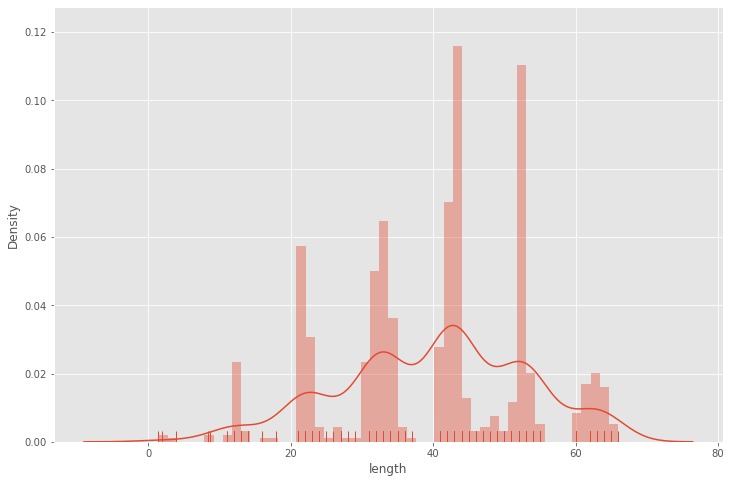

In [6]:
sns.distplot(df_numeric["length"], bins=50, kde=True, rug=True)

* Sydney'in kanalının videolarının uzunluğu genellikle 30, 40 veya 50 dakikadır ve bu çok modlu bir model sunar.

## Histogram: Çoklu Değişkenler
Genellikle, birden çok sayısal değişkeni görselleştirmek ve bunlara birlikte bakmak isteriz.

Belirli bir değişken grubu için histogramları çizmek için aşağıdaki **plot_multiple_histograms** fonksiyonunu oluşturuyoruz 

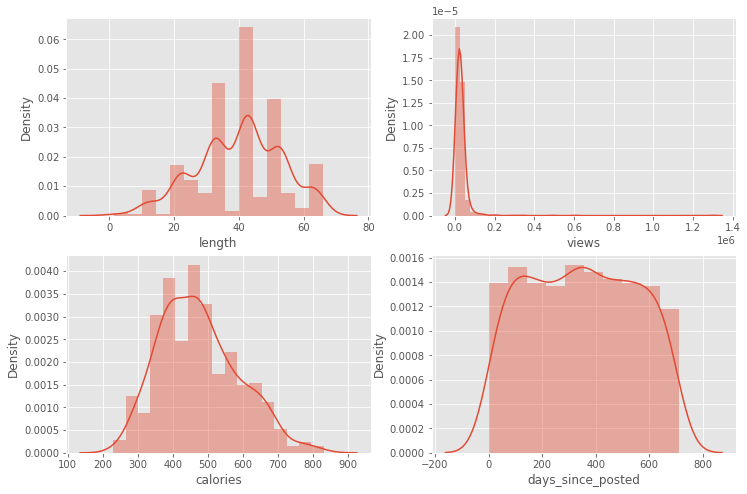

In [7]:
def plot_multiple_histograms(df, cols): 
    num_plots = len(cols) # 4 kolan
    num_cols = math.ceil(np.sqrt(num_plots))  # 2
    num_rows = math.ceil(num_plots/num_cols)  # 4/2 = 2
        
    fig, axs = plt.subplots(num_rows, num_cols)  # 2 satır ve 2 sütundan oluşssun
    
    for index, col in enumerate(cols):
        i = math.floor(index/num_cols)
        j = index - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.distplot(df[col], kde=True, ax=axs)
            else:
                sns.distplot(df[col], kde=True, ax=axs[j])
        else:
            sns.distplot(df[col], kde=True, ax=axs[i, j])

            
plot_multiple_histograms(df, ['length', 'views', 'calories', 'days_since_posted'])

Farklı değişkenlerin farklı dağılım şekilleri, aykırı değerler, çarpıklık vb. Gösterdiğini görebiliriz.

# Tek Değişkenli Analiz: Kategorik Değişkenler
## Çubuk Grafik: Tek Değişken
Çubuk grafik (veya Seaborn olarak countplot) histogramın kategorik değişkenler versiyonudur.
Bir çubuk grafik, farklı kategoriler arasındaki karşılaştırmaları gösterir.


* Öncelikle kategorik (sayısal olmayan) değişkenleri seçelim. Egzersiz videosunun odaklandığı vücut alanlarını temsil eden değişken **area** (alan) için çubuk grafiği çiziyoruz.

<AxesSubplot:xlabel='area', ylabel='count'>

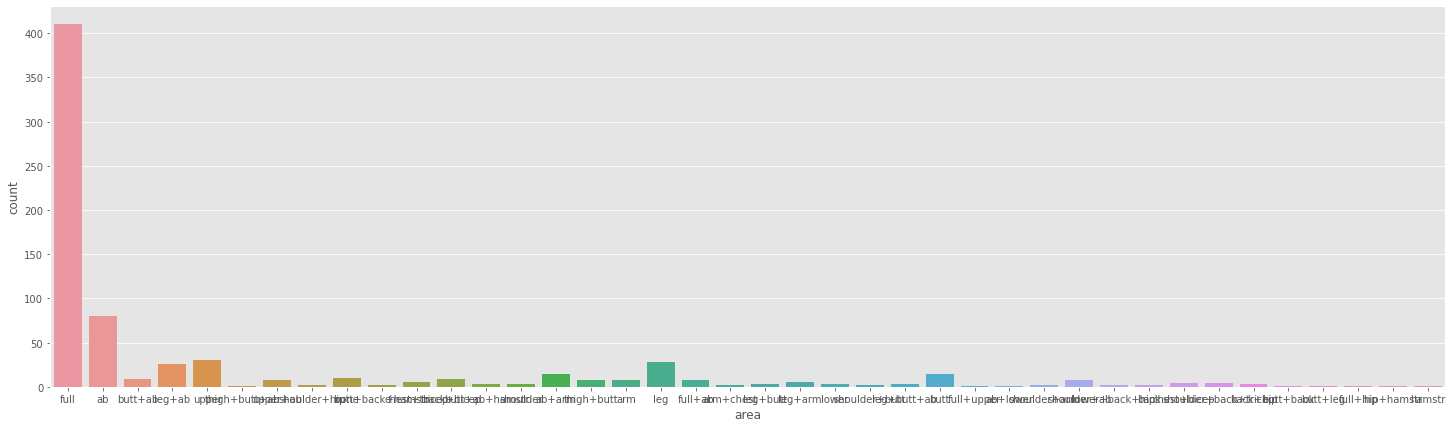

In [8]:
df_non_numeric = df.select_dtypes(exclude="number")

plt.figure(figsize=(25,7))

sns.countplot(x="area", data = df_non_numeric)

Videoların hedeflediği birçok alan var. Yakınlaştırmadan okumak zor. Yine de, bu videoların yarısından fazlasının (400'den fazla) “full” alanına odaklandığını görebiliyoruz; ikinci en popüler alan ise "ab" dir.

## Çubuk Grafik: Çoklu Değişkenler

Ayrıca, birden çok değişkenin çubuk grafiklerini aynı anda çizmek için **plot_multiple_countplots** işlevini oluşturuyoruz .

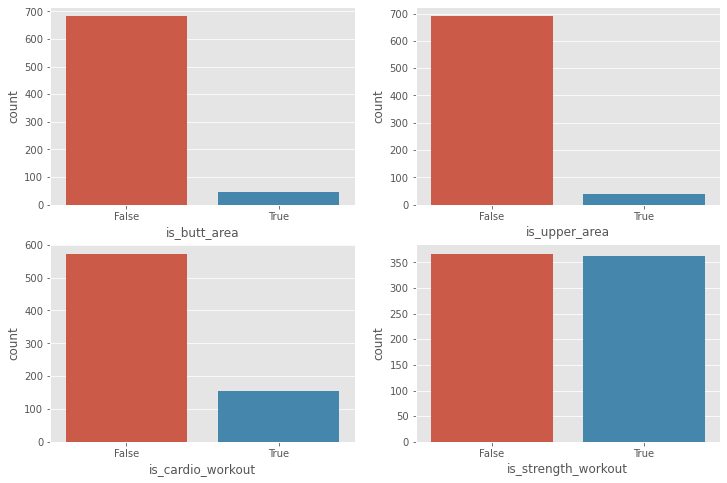

In [9]:
def plot_multiple_countplots(df, cols):
    
    num_plot = len(cols) # kaç sütun varsa o kadar grafik çizilecek
    
    num_cols = math.ceil(np.sqrt(num_plot))
    num_rows = math.ceil(num_plot/num_cols)
    
    fig, ax = plt.subplots(num_rows, num_cols)
    
    for index, col in enumerate(cols):
        
        i = math.floor(index/num_cols)
        j = index - i*num_cols
        
        if num_rows == 1: # 1. satıda isek
            if num_cols == 1: # 1.sütuna
                sns.countplot(x=df[col], ax = ax)
            else:
                sns.countplot(x=df[col], ax = ax[j])
        else:
            sns.countplot(x=df[col], ax = ax[i,j])
                
plot_multiple_countplots(df_non_numeric, ['is_butt_area', 'is_upper_area', 'is_cardio_workout', 'is_strength_workout'])
    

# Çok Değişkenli Analiz
Değişkenleri tek tek inceledikten sonra, birden çok değişkene birlikte bakalım.

Farklı değişken kombinasyonları arasındaki ilişkileri keşfetmek için farklı grafikler kullanılabilir.
## Dağılım Grafiği: İki Sayısal Değişken
İlk olarak, iki sayısal değişken arasındaki ilişkiyi nasıl keşfedebileceğimize bakalım.

> **Egzersiz uzunluğunun görüntüleme sayısını nasıl etkilediğine bakalım.**

Soruyu yanıtlamak için **dağılım grafikleri ( relplot )** kullanabiliriz.

Bir saçılma grafiğidir veri kümesi için, tipik olarak iki değişken değerlerini gösterir Kartezyen koordinatları kullanır. Noktalar kodlanmışsa (renk / şekil / boyut), bir ek değişken görüntülenebilir.

Veriler, her biri yatay eksendeki konumu belirleyen bir değişkenin değerine ve dikey eksendeki konumu belirleyen diğer değişkenin değerine sahip bir noktalar topluluğu olarak görüntülenir.

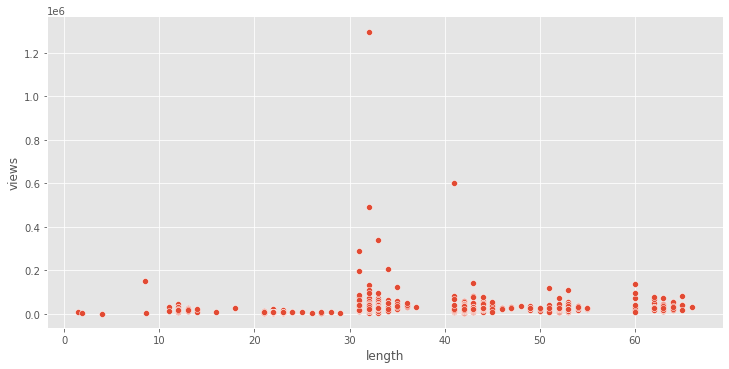

In [10]:
sns.relplot(x="length", y="views", data=df, aspect=2.0)

* Daha popüler videoların 30 ila 40 dakika arasında uzunluklara sahip olduğunu görebiliriz.

## Çubuk Grafik: İki Kategorik Değişken

> **Videolar içinde en yaygın 6 alanı ( alan2 ) ve en yaygın 4 egzersiz türünü (egzersiz_tipi2) görselleştirelim.**

In [11]:
df.area.value_counts() # video içerisindeki alanların büyükten küçüğe sıralanışı

full                    410
ab                       80
upper                    30
leg                      28
leg+ab                   26
ab+arm                   15
butt                     14
none                     10
back+bicep                9
butt+ab                   9
shoulder+ab               8
upper+ab                  8
thigh+butt                8
arm                       8
full+ab                   8
chest+tricep              5
leg+arm                   5
chest+bicep               4
shoulder+back+tricep      4
lower                     3
back+hip                  3
leg+butt+ab               3
leg+butt                  3
shoulder                  3
butt+ab+hamstr            3
shoulder+butt             2
lower+back+hip            2
shoulder+hip              2
butt+back+hamstr          2
arm+chest                 2
back                      2
shoulder+arm              2
ab+lower                  1
full+upper                1
thigh+butt+ab             1
butt+back           

In [12]:
df.area.value_counts()[:5] # zaten sıralı olan en büyük 5 egzersiz alanı

full      410
ab         80
upper      30
leg        28
leg+ab     26
Name: area, dtype: int64

In [13]:
df.area.value_counts().index[:5] # en büyük beş egzersizin indexlerini aldık.

Index(['full', 'ab', 'upper', 'leg', 'leg+ab'], dtype='object')

In [14]:
list(df.area.value_counts().index[:5]) # bu egzersizleri liste haline getirdik.

['full', 'ab', 'upper', 'leg', 'leg+ab']

In [15]:
top6 = list(df.area.value_counts().index[:5])
df["area2"] = df["area"]

msk = df["area2"].isin(top6)
df.loc[~msk, "area2"] = "Other"  # area2 içinde en büyük 5 egzersiz alanının dışında kalanlara "Other" yaz.


top4 = list(df["workout_type"].value_counts().index[:3])
df["workout_type2"] = df["workout_type"]

msk = df["workout_type2"].isin(top4)
df.loc[~msk,"workout_type2"] = "Other"

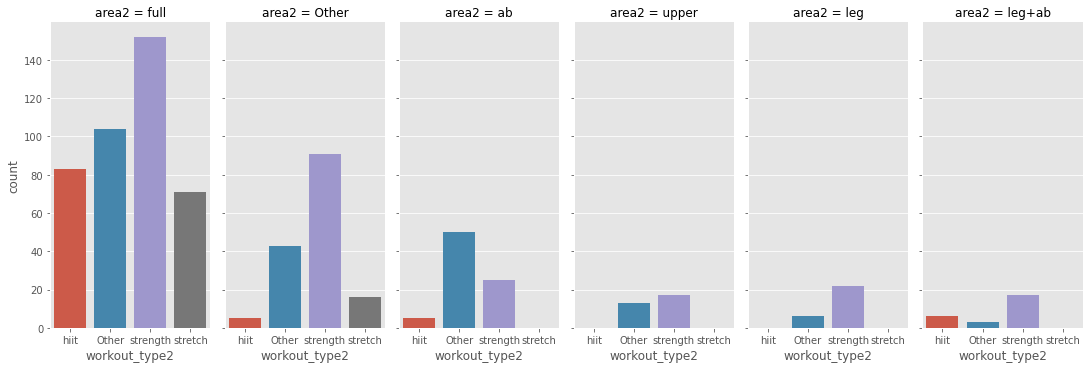

In [16]:
order = df["area2"].value_counts().index # sütun indexlerini(değerlerini) büyükten küçüğe sıralıyoruz.

sns.catplot(x="workout_type2",
            col='area2', # Izgaranın yönünü belirleyecek kategorik değişkenler.
            col_order=order,
            kind="count", data=df,
            aspect=0.5);

* Videolarda en yaygın olarak "tam" vücut "gücü" egzersizlerinin olduğunu görebiliriz.

# Kutu grafiği: Sayısal ve Kategorik Değişkenler
Kutu grafikleri , kategori gruplarını birlikte karşılaştırırken yararlı görselleştirmelerdir.

Bir kutu grafiği, veri kümesini beş numaralı bir özete dayalı olarak görüntülemenin standart bir yoludur: minimum, maksimum, örnek medyan ve birinci ve üçüncü çeyrekler.
Bir sayısal değişkeni kategorik bir değişkenin kategorileri arasında karşılaştırmak için yan yana kutu grafiklerini kullanabiliriz.

> **Sydney'in videoları haftanın belirli günlerinde daha fazla görüntüleniyor mu?**

<AxesSubplot:xlabel='day_of_week', ylabel='views'>

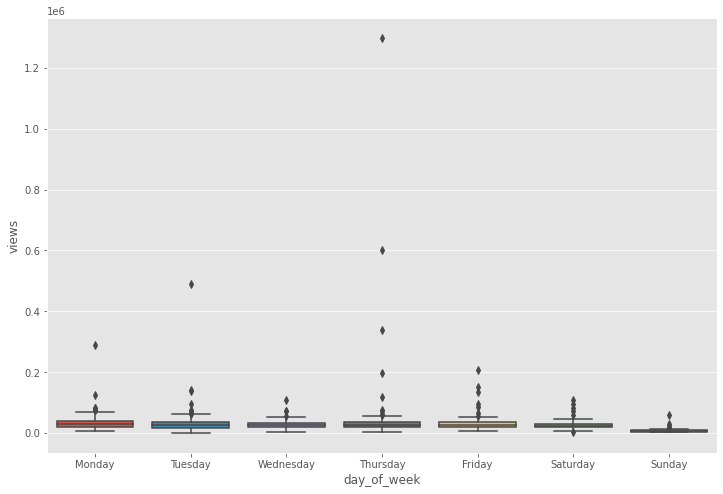

In [17]:
to_replace = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df["day_of_week_num"] = df.date.dt.dayofweek
df["day_of_week"] = df["day_of_week_num"].replace(to_replace = to_replace)

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.boxplot(x="day_of_week", y="views" , data=df, order=order)
# order ile x ekseninde günlerin sırasını grafikteki görüntüsünü istediğimiz sıraya göre ayarladık.

Bu ilginç ama aykırı değerler nedeniyle görülmesi zor. Onları kaldıralım.

<AxesSubplot:xlabel='day_of_week', ylabel='views'>

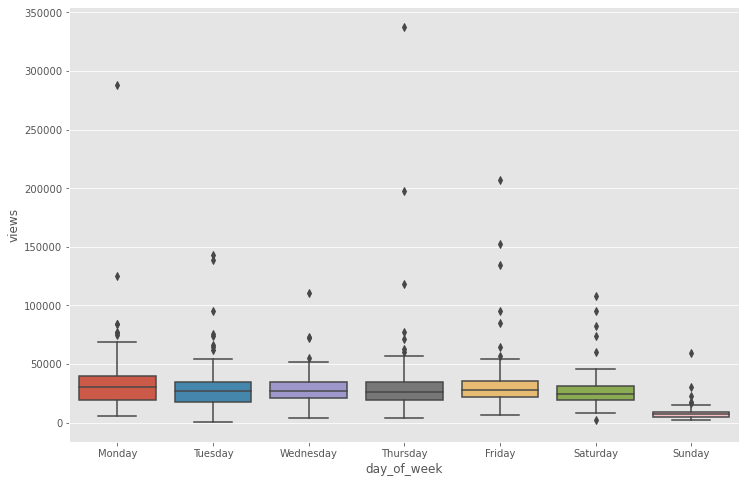

In [18]:
msk = df.views < 400000
sns.boxplot(x = "day_of_week", y = "views", data = df[msk], order = order)

Pazar videoları en az görüntülemeyi alırken. Pazartesi videolarının diğer günlerden daha fazla izlenme eğiliminde olduğunu görebiliyoruz. 

# Swarmplot: Sayısal ve Kategorik Değişkenler
Aynı soruya bakmanın başka bir yolu da Swarmplot'dur.

Bir Swarmplot noktaları üst üste gelmeyecek şekilde  kategorik dağılım olup (sadece kategorik ekseni boyunca) ayarlanır.

Bu, değerlerin dağılımının daha iyi bir temsilini verir.

<AxesSubplot:xlabel='day_of_week', ylabel='views'>

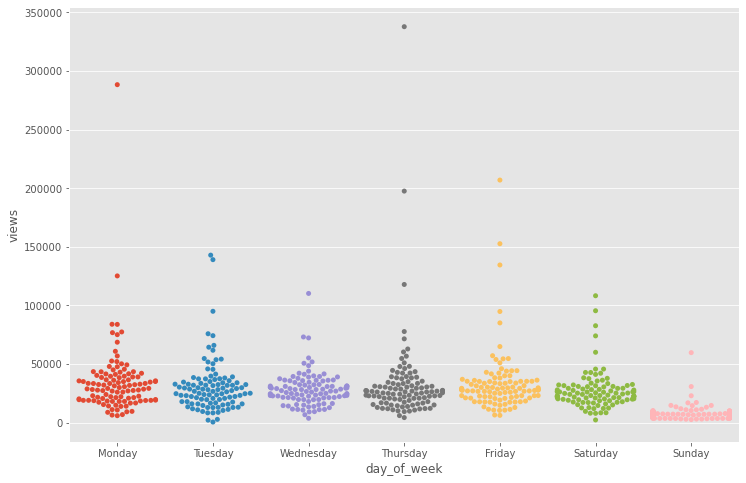

In [19]:
sns.swarmplot(x="day_of_week", y="views", data=df[msk], order=order)

## Kutu grafiği Grubu: Sayısal ve Kategorik Değişkenler
> **Belirli antrenman türleri için haftanın belirli günlerindeki görüşler daha mı yüksek?**

Bu soruyu cevaplamak için, iki kategorik değişken (egzersiz_türü, haftanın_günü) ve bir sayısal değişken (görünümler) dahil edilmiştir.

Bakalım bu sorunun cevabını nasıl görselleştirebiliriz.

Üç değişkeni birlikte görselleştirmek için bir panel kutu grafiği ( catplot ) kullanabiliriz.

* **Catplot, çeşitli görsel temsillerden birini kullanarak bir sayısal ve bir veya daha fazla kategorik değişken arasındaki ilişkiyi göstermek için kullanışlıdır.**

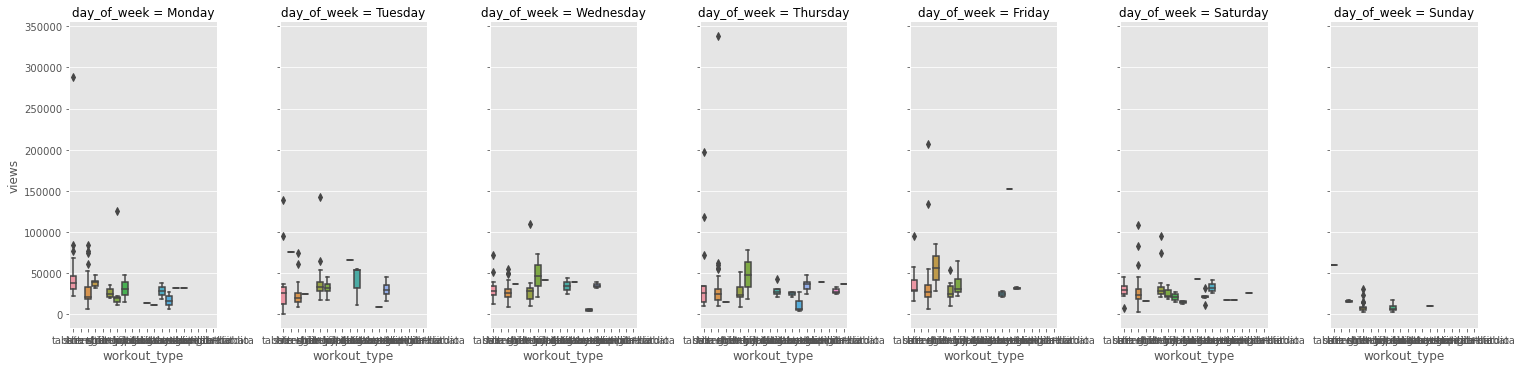

In [20]:
sns.catplot(x="workout_type", y="views",
            col="day_of_week", aspect=.6,
            kind="box", data=df[msk], col_order=order);

* Çok fazla egzersiz türü olduğu için oldukça karışık.

Antrenman türü dağılımına göre, "güç", "hiit", "esneme", "kardiyo" dışındaki kategorileri "Diğer" olarak gruplandırıyoruz.

In [21]:
df.workout_type.value_counts()

strength                324
hiit                     99
stretch                  87
cardio                   82
hiit+cardio              28
tabata+cardio            20
strength+hiit            16
tabata                   14
yoga                     13
none                     11
strength+cardio          10
pilat+cardio              8
pilat                     6
cardio+hiit               4
tabata+hiit+cardio        2
strength+hiit+cardio      1
tabata+hiit               1
yoga+pilat                1
tabata+pilat+cardio       1
strength+tabata           1
Name: workout_type, dtype: int64

In [22]:
top4 = list(df.workout_type.value_counts().index[:4])
df["workout_type2"] = df["workout_type"]

msk = df["workout_type2"].isin(top4)
df.loc[~msk,"workout_type2"] = "Other"

* Ayrıca, alanı daha da netleştirmek için aykırı değerleri kaldırıyoruz.

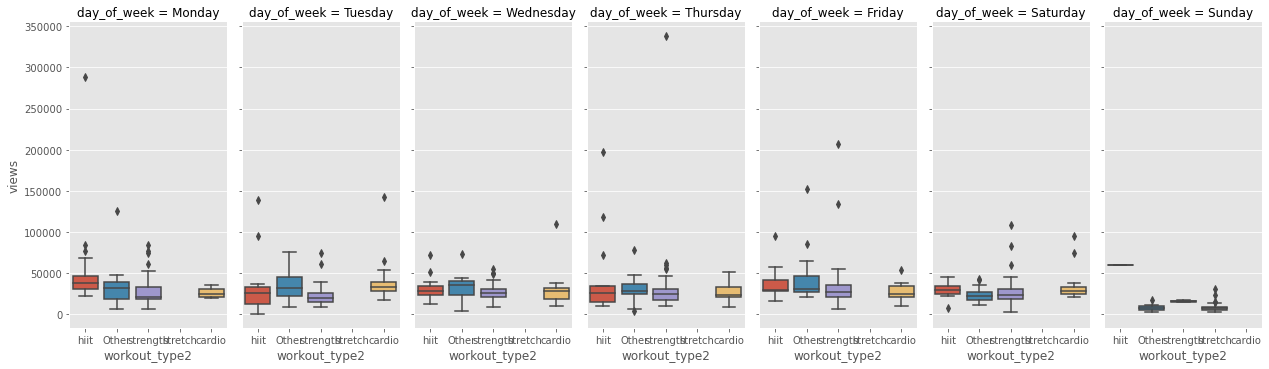

In [23]:
msk = df.views < 400000

sns.catplot(x="workout_type2", y="views",
            col="day_of_week",
            kind="box", data=df[msk], col_order=order,
            aspect=0.5)


Aşağıdaki gibi şeyleri fark edebiliriz:

* "Stretch" (esneme) antrenmanları sadece Pazar günleri yayınlanır.
* "Hiit" antrenmanlarının Pazartesi günleri daha fazla izlendiği görülüyor.


> Birden çok değişkeni görselleştirmek için pivot tabloları ve ısı haritalarını da kullanabiliriz.

Bir **ısı haritası** iki boyutta renk olarak bir fenomen büyüklüğünü gösteren bir veri görselleştirme tekniğidir.

Renkteki varyasyon ton veya yoğunluk olabilir, bu da okuyucuya fenomenin nasıl kümelendiği veya uzayda nasıl değiştiği konusunda açık görsel ipuçları verir.

* Örneğin, aşağıdaki ısı haritasında eksen olarak alan ve egzersiz_tipi kategorileri vardır; renk ölçeği her hücredeki görünümleri temsil eder.

<AxesSubplot:xlabel='workout_type', ylabel='area'>

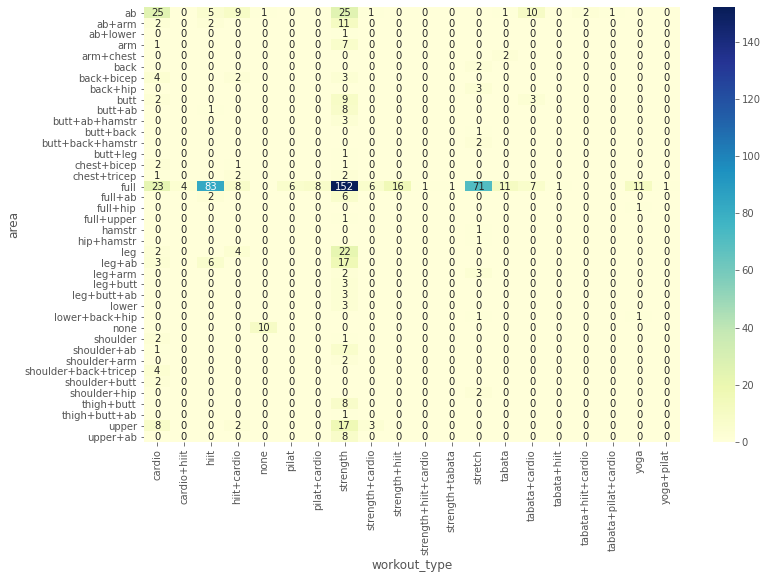

In [24]:
df_area_workout = df.groupby(['area', 'workout_type'])['views'].count().reset_index()

df_area_workout_pivot = df_area_workout.pivot(index='area', columns='workout_type', values='views').fillna(0)

sns.heatmap(df_area_workout_pivot, annot=True, fmt='.0f', cmap="YlGnBu")

# annot: True ise, her hücreye veri değerini yazın.
# fmt : Açıklama eklerken kullanılacak dize biçimlendirme kodu
# cmap : Veri değerlerinden renk uzayına eşleme. 

### Yukarıdaki kodu adım adım inceleyelim..

In [25]:
df.groupby(['area', 'workout_type'])['views'].count() # ilgili alan ve kategoride kaç görüntüleme var.

area      workout_type   
ab        cardio             25
          hiit                5
          hiit+cardio         9
          none                1
          strength           25
                             ..
upper     cardio              8
          hiit+cardio         2
          strength           17
          strength+cardio     3
upper+ab  strength            8
Name: views, Length: 89, dtype: int64

**reset_index():** DataFrame yapısını korumak için kullanılır.

In [26]:
df.groupby(["area","workout_type"])["views"].count().reset_index()

,area,workout_type,views
0,ab,cardio,25
1,ab,hiit,5
2,ab,hiit+cardio,9
3,ab,none,1
4,ab,strength,25
...,...,...,...
84,upper,cardio,8
85,upper,hiit+cardio,2
86,upper,strength,17
87,upper,strength+cardio,3


**df.pivot( index=None, columns=None, values=None ):** Verilen dizin/sütun değerlerine göre düzenlenen yeniden şekillendirilmiş DataFrame'i döndürür.

In [27]:
df_area_workout.pivot(index='area', columns='workout_type', values='views')

workout_type,cardio,cardio+hiit,hiit,hiit+cardio,none,pilat,pilat+cardio,strength,strength+cardio,strength+hiit,strength+hiit+cardio,strength+tabata,stretch,tabata,tabata+cardio,tabata+hiit,tabata+hiit+cardio,tabata+pilat+cardio,yoga,yoga+pilat
area,,,,,,,,,,,,,,,,,,,,
ab,25.0,NaN,5.0,9.0,1.0,NaN,NaN,25.0,1.0,NaN,NaN,NaN,NaN,1.0,10.0,NaN,2.0,1.0,NaN,NaN
ab+arm,2.0,NaN,2.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ab+lower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arm,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arm+chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
back+bicep,4.0,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
back+hip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
butt,2.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN


In [28]:
df_area_workout.pivot(index="area", columns="workout_type", values="views").fillna(0)
# Boş verilere 0 değerini atadık.

workout_type,cardio,cardio+hiit,hiit,hiit+cardio,none,pilat,pilat+cardio,strength,strength+cardio,strength+hiit,strength+hiit+cardio,strength+tabata,stretch,tabata,tabata+cardio,tabata+hiit,tabata+hiit+cardio,tabata+pilat+cardio,yoga,yoga+pilat
area,,,,,,,,,,,,,,,,,,,,
ab,25.0,0.0,5.0,9.0,1.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0,0.0,2.0,1.0,0.0,0.0
ab+arm,2.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ab+lower,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arm,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
arm+chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
back,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
back+bicep,4.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
back+hip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
butt,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


# İlişki Testi ve Dağılım Grafiği: Sayısal ve Kategorik Değişkenler
> **Birden çok değişken arasındaki ilişkileri otomatik olarak nasıl keşfederiz?**

In [29]:
cols = ['length', 'views', 'calories', 'days_since_posted', 'area', 'workout_type', 'day_of_week']
df_test = df[cols]
df_test.head()

,length,views,calories,days_since_posted,area,workout_type,day_of_week
0,31.0,197591,500.0,711.0,full,hiit,Thursday
1,31.0,75863,NaN,706.0,full,tabata+hiit,Tuesday
2,32.0,60328,350.0,704.0,ab,strength,Thursday
3,31.0,59741,430.0,701.0,full,hiit,Sunday
4,31.0,18515,285.0,700.0,full,strength,Monday


In [30]:
numeric_columns = set(df_test.select_dtypes(include=["number"]).columns) # Sayısal ve sayısal olmayan değişkenleri belirliyoruz.

non_numeric_columns = set(df_test.columns) - numeric_columns

print(numeric_columns)
print(non_numeric_columns)

{'views', 'length', 'days_since_posted', 'calories'}
{'workout_type', 'area', 'day_of_week'}


* 4 sayısal değişkenimiz ve 3 kategorik değişkenimiz var. Aralarında birçok karmaşık ilişki olabilir!

Bu bölümde, aralarındaki ilişkileri (çoklu bağlantı dahil) test etmek için Makine Öğrenimi teknikleriyle DAHA FAZLA YouTube Görüntülemesi Nasıl Elde Edilir konusunda olduğu gibi aynı yöntemi kullanıyoruz .

Yüksek düzeyde, bunu başarmak için **k-fold Cross-Validation** kullanıyoruz.

İlk önce kategorik değişkenleri dönüştürüyoruz. 5-kat çapraz doğrulama kullanacağımız için, her kategori seviyesi için en az 5 gözlem olduğundan emin olmamız gerekiyor.

In [31]:
for c in non_numeric_columns:
    cnt = df_test[c].value_counts()
    small_cnts = list(cnt[cnt<5].index)
    
    s_replace = {}
    
    for sm in small_cnts:
        
        s_replace[sm] = "other"
        
    df_test[c] = df_test[c].replace(s_replace)
    df_test[c] = df_test[c].fillna("other") 

Daha sonra, her değişkeni gözden geçirip diğer değişkenleri kullanarak onu tahmin etmek için bir model uyduruyoruz. Basit bir Gradient Boosting Model (GBM) modeli ve K-kat doğrulaması kullanıyoruz.

**Hedef değişkenin sayısal veya kategorik olmasına bağlı olarak, farklı modeller ve puanlar uygularız.**

**Hedef sayısal olduğunda, Gradient Boosting Regressor modelini ve Root Mean Squared Error (RMSE) kullanırız ; hedef kategorik olduğunda, Gradient Boosting Classifier modelini ve Accuracy'yi kullanırız.**

Her hedef için, K-kat doğrulama puanını (puanların ortalaması) ve en önemli 5 öngörücüyü yazdırıyoruz .

Ayrıca rastgele sayılardan oluşan rand0 , rand1 , rand2 üç özellik ekliyoruz . Değişkenler arasındaki ilişkiyi karşılaştırırken çapa görevi görürler. Bu rastgele değişkenlere kıyasla bir yordayıcı daha az önemli veya benzer ise, o zaman hedef değişkenin önemli bir yordayıcısı değildir.

In [32]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#Özellik önemlerine bakacağız, bu yüzden bir kıyaslama olarak hareket etmek için rastgele özellikler koyuyoruz.
df_test['rand0'] = np.random.rand(df_test.shape[0])
df_test['rand1'] = np.random.rand(df_test.shape[0])
df_test['rand2'] = np.random.rand(df_test.shape[0])

# ilişkiler için test.
# sayısal hedefler için.
reg = GradientBoostingRegressor(n_estimators=100, max_depth=5,
                                learning_rate=0.1, loss='ls',
                                random_state=1)
# kategorik hedefler için.
clf = GradientBoostingClassifier(n_estimators=100, max_depth=5,
                                learning_rate=0.1, loss='deviance',
                                random_state=1)

df_test['calories'] = df_test['calories'].fillna(0)# sadece kaloriler eksik değerlere sahip olmalıdır.

# doğrusallığı test etmek için diğerlerini kullanarak bir özelliği tahmin etmeye çalışın, böylece sonuçları yorumlamak daha kolay olur
for c in cols:
    #c tahmin edilecek şeydir.
    
    if c not in ['rand0', 'rand1', 'rand2']: 

        X = df_test.drop([c], axis=1) # tahmin edilecek şeyi bırak.
        X = pd.get_dummies(X)
        y = df_test[c]

        print(c)

        if c in non_numeric_columns:
            scoring = 'accuracy'
            model = clf
            scores = cross_val_score(clf, X, y, cv=5, scoring=scoring)
            print(scoring + ": %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        elif c in numeric_columns:
            scoring = 'neg_root_mean_squared_error'
            model = reg
            scores = cross_val_score(reg, X, y, cv=5, scoring=scoring)
            print(scoring.replace('neg_', '') + ": %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))
        else:
            print('what is this?')

        model.fit(X, y)
        df_importances = pd.DataFrame(data={'feature_name': X.columns, 'importance': model.feature_importances_}).sort_values(by='importance', ascending=False)
        top5_features = df_importances.iloc[:5]
        print('top 5 features:')
        print(top5_features)

        print()

length
root_mean_squared_error: 5.46 (+/- 1.96)
top 5 features:
        feature_name  importance
1           calories    0.802464
0              views    0.068391
2  days_since_posted    0.045976
3              rand0    0.015690
4              rand1    0.012770

views
root_mean_squared_error: 85904.80 (+/- 52091.34)
top 5 features:
         feature_name  importance
2   days_since_posted    0.591972
5               rand2    0.101822
21    area_thigh+butt    0.098298
4               rand1    0.051749
1            calories    0.045593

calories
root_mean_squared_error: 76.79 (+/- 41.49)
top 5 features:
          feature_name  importance
0               length    0.862700
1                views    0.052795
2    days_since_posted    0.024031
41  day_of_week_Sunday    0.014066
3                rand0    0.008332

days_since_posted
root_mean_squared_error: 188.10 (+/- 128.08)
top 5 features:
  feature_name  importance
1        views    0.308531
0       length    0.238709
2     calories    0.15

* Yukarıdaki sonuçlardan, hedef değişkenlerin her birine ve bunların yordayıcılarla ilişkisine bakabiliriz.

Uzunluk ve kalori arasında güçlü bir ilişki olduğunu görebiliriz.

Bunları görselleştirmek için bir dağılım grafiği kullanalım: x ekseni uzunluk olarak ve y ekseni kalori olarak, noktaların boyutu ise görünümleri temsil eder.

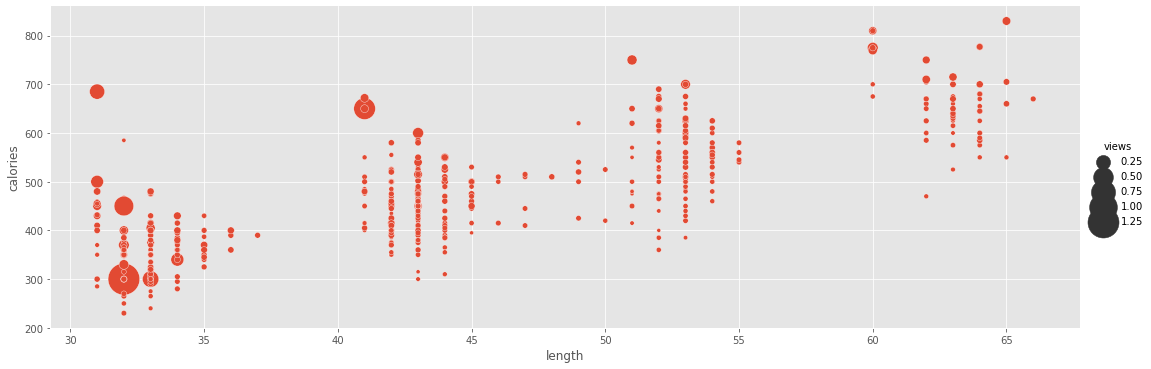

In [33]:
sns.relplot(x="length", y="calories", size="views", sizes=(10,1000), data=df, aspect=3.0)
# aspect : inç tipinde en boy oranını verir. Varsayılan 1

Video ne kadar uzun olursa o kadar fazla kalori yakıldığını görebiliriz ki bu sezgiseldir. Daha fazla görüntülenen videoların daha kısa bir uzunluğa sahip olma eğiliminde olduğunu da görebiliriz.